jupyter nbconvert --to slides --reveal-prefix "http://cdn.jsdelivr.net/reveal.js/2.6.2"

In [5]:
import pods
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

#### MLAI Week 4: Basis Functions

### Neil D. Lawrence

### 20th October 2015

### Review
- Last time: explored least squares for univariate and multivariate regression.
- Introduced matrices, linear algebra and derivatives.
- This time: introduce *basis functions* for non-linear regression models.

### Nonlinear Regression

-   Problem with Linear Regression—$\mathbf{x}$ may not be linearly
    related to $\mathbf{y}$.

-   Potential solution: create a feature space: define
    $\phi(\mathbf{x})$ where $\phi(\cdot)$ is a
    nonlinear function of $\mathbf{x}$.

-   Model for target is a linear combination of these nonlinear
    functions
    $$f(\mathbf{x}) = \sum_{j=1}^k w_j \phi_j(\mathbf{x})$$

### Quadratic Basis

-   Basis functions can be global. E.g. quadratic basis:
    $$\boldsymbol{\phi} = [{\color{\redColor}1}, {\color{\magentaColor}x}, {\color{\blueColor}x^2}]$$

### Functions Derived from Quadratic Basis

In [ ]:
figure 
plotWidth = 6; 
w = randn(3, 1); 
phi = \[phi1 phi2 phi3\]; 
f =phi*w; 
a = plot(x, f, ’-’, ’color’, blueColor); 
hold on 
plot(x, phi1,’-’, ’color’, redColor); 
plot(x, phi2, ’-’, ’color’, magentaColor);
plot(x, phi3, ’-’, ’color’, blueColor); 
set(gca, ’ylim’, \[-4 3\])
set(gca, ’xtick’, \[-1 0 1\]) 
set(a, ’linewidth’, 3)
xlabel(’$x$’) 
ylabel(’$f(x)$’)

printLatexText(\[’$\color{\redColor}w_1 = ' num2str(w(1)) '$,$\color{\magentaColor}w_2 = ' num2str(w(2)) '$,
$\color{\blueColor}w_3 = ' num2str(w(3)) '$’\],’quadraticFunctionText1’, ’../../../ml/tex/talks/’)

ylim = get(gca, ’ylim’); xlim = get(gca, ’xlim’); 
line(\[xlim(1)
xlim(1)\], ylim, ’color’, blackColor) 
line(xlim, \[ylim(1) ylim(1)\],’color’, blackColor) 
box off

printLatexPlot(’quadraticFunction1’, dirName, plotWidth);

w = randn(3, 1); 
f = phi\*w; 
set(a, ’ydata’, f);

printLatexText(\[’$\color{\redColor}w_1 = ' num2str(w(1)) '$,$\color{\magentaColor}w_2 = ' num2str(w(2)) '$,
$\color{\blueColor}w_3 = ' num2str(w(3)) '$’\],’quadraticFunctionText2’, ’../../../ml/tex/talks/’)

ylim = get(gca, ’ylim’); xlim = get(gca, ’xlim’); 
line(\[xlim(1) xlim(1)\], ylim, ’color’, blackColor) 
line(xlim, \[ylim(1) ylim(1)\], ’color’, blackColor) box off

printLatexPlot(’quadraticFunction2’, dirName, plotWidth);

w = randn(3, 1); 
f = phi\*w; 
set(a, ’ydata’, f);

printLatexText(\[’$\color{\redColor}w_1 = ' num2str(w(1)) '$,
$\color{\magentaColor}w_2 = ' num2str(w(2)) '$,
$\color{\blueColor}w_3 = ' num2str(w(3)) '$’\],
’quadraticFunctionText3’, ’../../../ml/tex/talks/’)

ylim = get(gca, ’ylim’); 
xlim = get(gca, ’xlim’); 
line(\[xlim(1) xlim(1)\], ylim, ’color’, blackColor) 
line(xlim, \[ylim(1) ylim(1)\], ’color’, blackColor) 
box off

printLatexPlot(’quadraticFunction3’, dirName, plotWidth);

$f(x) = {\color{\redColor}w_1} + {\color{\magentaColor}w_2x} + {\color{\blueColor}w_3 x^2}$

In [ ]:
figure
plotWidth = 6;
xMin = -1.3; xMax = 1.3;
x = linspace(xMin, xMax, 100)';
phi1 = ones(100, 1);
phi2 = x;
phi3 = x.*x;

a = plot(x, phi1, '-', 'color', redColor);
set(gca, 'ylim', [-2 2]);
set(gca, 'ytick', [-2 -1 0 1 2])
set(gca, 'xtick', [-1 0 1])
hold on
set(a, 'linewidth', 3)
text(0, 1.4, '\color{\redColor}$\phi(x) = 1$', 'horizontalalignment', 'center')
xlabel('$x$')
ylabel('$\phi(x)$')

ylim = get(gca, 'ylim');
xlim = get(gca, 'xlim');
line([xlim(1) xlim(1)], ylim, 'color', blackColor)
line(xlim, [ylim(1) ylim(1)], 'color', blackColor)
box off

printLatexPlot('quadraticBasis1', dirName, plotWidth);

b = plot(x, phi2, '-', 'color', magentaColor);
set(b, 'linewidth', 3)
text(0, -0.7, '\color{\magentaColor}$\phi(x) = x$', 'horizontalalignment', 'center')

ylim = get(gca, 'ylim');
xlim = get(gca, 'xlim');
line([xlim(1) xlim(1)], ylim, 'color', blackColor)
line(xlim, [ylim(1) ylim(1)], 'color', blackColor)
box off

printLatexPlot('quadraticBasis2', dirName, plotWidth);

c = plot(x, phi3, '-', 'color', blueColor);
set(c, 'linewidth', 3)
text(0.75, -0.2, '\color{\blueColor}$\phi(x) = x^2$', 'horizontalalignment', 'center')
ylim = get(gca, 'ylim');
xlim = get(gca, 'xlim');
line([xlim(1) xlim(1)], ylim, 'color', blackColor)
line(xlim, [ylim(1) ylim(1)], 'color', blackColor)
box off

printLatexPlot('quadraticBasis3', dirName, plotWidth);
    


### Radial Basis Functions

-   Or they can be local. E.g. radial (or Gaussian) basis
    $\phi_j(x) = \exp\left(-\frac{(x-\mu_j)^2}{\lengthScale^2}\right)$


In [ ]:
figure
plotWidth = 8;
options = printLatexOptions;
options.maintainAspect = false;
options.height = 4.5;
xMin = -3; xMax = 3;
x = linspace(xMin, xMax, 100)';
phi1 = exp(-2*(x + 1).^2);
phi2 = exp(-2*(x).^2);
phi3 = exp(-2*(x - 1).^2);

a = plot(x, phi1, '-', 'color', redColor);
set(gca, 'ylim', [-0.6 1.6]);
set(gca, 'xtick', [-2 -1 0 1 2])
set(gca, 'ytick', [-1 0 1])
hold on
set(a, 'linewidth', 3)
text(-1.25, -0.25, '\color{\redColor}\small$\phi_1(x) = e^{-2(x + 1)^2}$', 'horizontalalignment', 'center')
xlabel('$x$')
ylabel('$\phi(x)$')
ylim = get(gca, 'ylim');
xlim = get(gca, 'xlim');
line([xlim(1) xlim(1)], ylim, 'color', blackColor)
line(xlim, [ylim(1) ylim(1)], 'color', blackColor)
box off

printLatexPlot('radialBasis1', dirName, plotWidth, options);

b = plot(x, phi2, '-', 'color', magentaColor);
set(b, 'linewidth', 3)
text(0, 1.25, '\color{\magentaColor}\small$\phi_2(x) = e^{-2x^2}$', 'horizontalalignment', 'center')
ylim = get(gca, 'ylim');
xlim = get(gca, 'xlim');
line([xlim(1) xlim(1)], ylim, 'color', blackColor)
line(xlim, [ylim(1) ylim(1)], 'color', blackColor)
box off

printLatexPlot('radialBasis2', dirName, plotWidth, options);

c = plot(x, phi3, '-', 'color', blueColor);
set(c, 'linewidth', 3)
text(1.25, -0.4, '\color{\blueColor}\small$\phi_3(x) = e^{-2(x-1)^2}$', 'horizontalalignment', 'center')

ylim = get(gca, 'ylim');
xlim = get(gca, 'xlim');
line([xlim(1) xlim(1)], ylim, 'color', blackColor)
line(xlim, [ylim(1) ylim(1)], 'color', blackColor)
box off

printLatexPlot('radialBasis3', dirName, plotWidth, options);
    

### Functions Derived from Radial Basis

$f(x) = {\color{\redColor}w_1 e^{-2(x+1)^2}}  + {\color{\magentaColor}w_2e^{-2x^2}} + {\color{\blueColor}w_3 e^{-2(x-1)^2}}$

In [ ]:
figure
plotWidth = 6;
w = randn(3, 1);
phi = [phi1 phi2 phi3];
f = phi*w;
a = plot(x, f, '-', 'color', blueColor);
hold on
plot(x, phi1, '-', 'color', redColor);
plot(x, phi2, '-', 'color', magentaColor);
plot(x, phi3, '-', 'color', blueColor);
set(gca, 'ylim', [-2 2])
set(gca, 'xtick', [-3 -2 -1 0 1 2 3])
set(gca, 'ytick', [-2 -1 0 1 2])
set(a, 'linewidth', 3)
xlabel('$x$')
ylabel('$f(x)$')

% Print details for caption
printLatexText(['$\color{\redColor}w_1 = ' num2str(w(1)) '$, $\color{\magentaColor}w_2 = ' num2str(w(2)) '$, $\color{\blueColor}w_3 = ' num2str(w(3)) '$'], 'radialFunctionText1', '../../../ml/tex/talks/')

ylim = get(gca, 'ylim');
xlim = get(gca, 'xlim');
line([xlim(1) xlim(1)], ylim, 'color', blackColor)
line(xlim, [ylim(1) ylim(1)], 'color', blackColor)
box off

% Print plot
printLatexPlot('radialFunction1', dirName, plotWidth, options);

% Second Function
w = randn(3, 1);
f = phi*w;
set(a, 'ydata', f);

% Print details for caption
printLatexText(['$\color{\redColor}w_1 = ' num2str(w(1)) '$, $\color{\magentaColor}w_2 = ' num2str(w(2)) '$, $\color{\blueColor}w_3 = ' num2str(w(3)) '$'], 'radialFunctionText2', '../../../ml/tex/talks/')

ylim = get(gca, 'ylim');
xlim = get(gca, 'xlim');
line([xlim(1) xlim(1)], ylim, 'color', blackColor)
line(xlim, [ylim(1) ylim(1)], 'color', blackColor)
box off

% Print plot
printLatexPlot('radialFunction2', dirName, plotWidth, options);

% Third Function
w = randn(3, 1);
f = phi*w;
set(a, 'ydata', f);

% Print details for caption
printLatexText(['$\color{\redColor}w_1 = ' num2str(w(1)) '$, $\color{\magentaColor}w_2 = ' num2str(w(2)) '$, $\color{\blueColor}w_3 = ' num2str(w(3)) '$'], 'radialFunctionText3', '../../../ml/tex/talks/')

ylim = get(gca, 'ylim');
xlim = get(gca, 'xlim');
line([xlim(1) xlim(1)], ylim, 'color', blackColor)
line(xlim, [ylim(1) ylim(1)], 'color', blackColor)
box off


% Print plot
printLatexPlot('radialFunction3', dirName, plotWidth, options);



### Basis Function Models

-   The *prediction function* is now defined as
    $$f(\mathbf{x}_i) = \sum_{j=1}^m w_j \phi_{i, j} + c$$


## Vector Notation

-   Write in vector notation,
    $$f(\mathbf{x}_i) = \mathbf{w}^\top \boldsymbol{\phi}_i + c$$

### Log Likelihood for Basis Function Model

-   The likelihood of a single data point is
    $$p\left(y_i|x_i\right)=\frac{1}{\sqrt{2\pi\sigma^2}}\exp
        \left(-\frac{\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}\right).$$

-   Leading to a log likelihood for the data set of
    $$L(\mathbf{w},\sigma^2)= -\frac{n}{2}\log \sigma^2
          -\frac{n}{2}\log 2\pi -\frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}.$$

-   And a corresponding *objective function* of the form
    $$E(\mathbf{w},\sigma^2)= \frac{n}{2}\log
          \sigma^2 + \frac{\sum
            _{i=1}^{n}\left(y_i-\mathbf{w}^{\top}\boldsymbol{\phi}_i\right)^{2}}{2\sigma^2}.$$

### Expand the Brackets

$$\begin{aligned}
  E(\mathbf{w},\sigma^2)  = & \frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum _{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}\sum _{i=1}^{n}y_i\mathbf{w}^{\top}\boldsymbol{\phi}_i\\&+\frac{1}{2\sigma^2}\sum _{i=1}^{n}\mathbf{w}^{\top}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\mathbf{w} +\text{const}.\\
    = & \frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum _{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}
  \mathbf{w}^\top\sum_{i=1}^{n}\boldsymbol{\phi}_iy_i\\&+\frac{1}{2\sigma^2} \mathbf{w}^{\top}\left[\sum
    _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\right]\mathbf{w} +\text{const}.\end{aligned}$$

### Multivariate Derivatives Reminder

-   We will need some multivariate calculus.
    $$\frac{\text{d}\mathbf{a}^{\top}\mathbf{w}}{\text{d}\mathbf{w}}=\mathbf{a}$$
    and
    $$\frac{\text{d}\mathbf{w}^{\top}\mathbf{A}\mathbf{w}}{\text{d}\mathbf{w}}=\left(\mathbf{A}+\mathbf{A}^{\top}\right)\mathbf{w}$$
    or if $\mathbf{A}$ is symmetric (*i.e.*
    $\mathbf{A}=\mathbf{A}^{\top}$)
    $$\frac{\text{d}\mathbf{w}^{\top}\mathbf{A}\mathbf{w}}{\text{d}\mathbf{w}}=2\mathbf{A}\mathbf{w}.$$

### Differentiate

Differentiating with respect to the vector $\mathbf{w}$ we obtain
$$\frac{\text{d} L\left(\mathbf{w},\beta \right)}{\text{d} \mathbf{w}}=\frac{1}{\sigma^2} \sum _{i=1}^{n}\boldsymbol{\phi}_iy_i-\frac{1}{\sigma^2} \left[\sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\right]\mathbf{w}$$
Leading to
$$\mathbf{w}^{*}=\left[\sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^{\top}\right]^{-1}\sum _{i=1}^{n}\boldsymbol{\phi}_iy_i,$$
Rewrite in matrix notation:
$$\sum _{i=1}^{n}\boldsymbol{\phi}_i\boldsymbol{\phi}_i^\top = \boldsymbol{\Phi}^\top \boldsymbol{\Phi}$$
$$\sum _{i=1}^{n}\boldsymbol{\phi}_iy_i = \boldsymbol{\Phi}^\top \mathbf{y}$$

### Update Equations

-   Update for $\mathbf{w}^{*}$.
    $$\mathbf{w}^{*} = \left(\boldsymbol{\Phi}^\top \boldsymbol{\Phi}\right)^{-1} \boldsymbol{\Phi}^\top \mathbf{y}$$

-   The equation for $\left.\sigma^2\right.^{*}$ may also be found
    $$\left.\sigma^2\right.^{{*}}=\frac{\sum _{i=1}^{n}\left(y_i-\left.\mathbf{w}^{*}\right.^{\top}\boldsymbol{\phi}_i\right)^{2}}{n}.$$

### Avoid Direct Inverse

- E.g. Solve for $\mathbf{w}$
  $$\left(\boldsymbol{\Phi}^\top \boldsymbol{\Phi}\right)\mathbf{w} = \boldsymbol{\Phi}^\top \mathbf{y}$$
  
- See `np.linalg.solve`

- In practice use $

### Polynomial Fits to Olympic Data

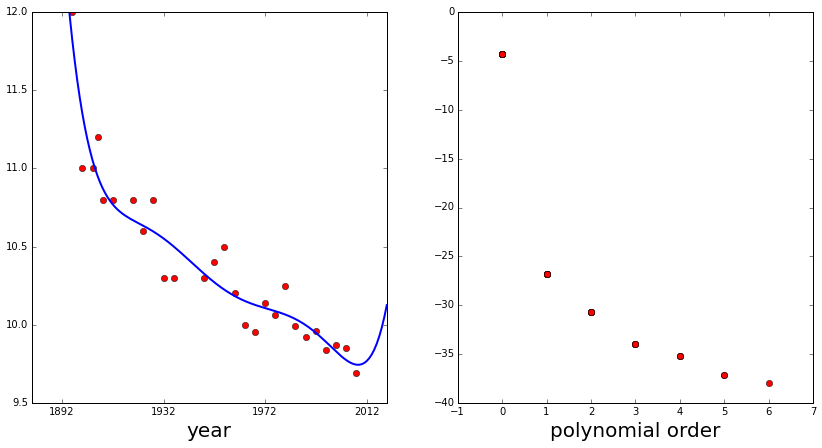

In [45]:
data = pods.datasets.olympic_100m_men()
f, ax = plt.subplots(1, 2, figsize=(14,7))
#ax.plot(data['X'], data['Y'], 'rx', markersize=10)
x = data['X']
y = data['Y']
x_pred = np.linspace(1892, 2020, 130)[:, None]

# Rescale x data
x_span = x.max() - x.min()

max_order = 6
num_data = x.shape[0]
err = np.array([np.nan]*(max_order+1))

for order in range(0,max_order+1):
    Phi = np.zeros((num_data, order+1))
    Phi_pred = np.zeros((x_pred.shape[0], order+1))
    for i in range(0,order+1):
        Phi[:, i:i+1] = (2*(x-x.min())/x_span - 1)**i
        Phi_pred[:, i:i+1] = (2*(x_pred-x.min())/x_span - 1)**i

    # numerically this is not a good idea, but this is what the maths looks like
    w_star = np.linalg.solve(np.dot(Phi.T,Phi),np.dot(Phi.T,y))
    y_pred = np.dot(Phi_pred,w_star)
    sum_squares = ((y - np.dot(Phi,w_star))**2).sum()
    sigma2 = sum_squares/num_data;
    
    err[order] = num_data/2.*np.log(sigma2) + sum_squares/(2.*sigma2)

    ax[0].cla()
    ax[0].plot(x, y, 'o', color=[1, 0, 0], markersize=6, linewidth=3)
    ylim = ax[0].get_ylim()
    ax[0].plot(x_pred, y_pred, color=[0, 0, 1], linewidth=2)
    ax[0].set_xlabel('year', fontsize=20)
    ax[0].set_ylim(ylim)
    plt.sca(ax[0])
    plt.xticks([1892, 1932, 1972, 2012])

    xlim = ax[0].get_xlim()
    
    file_name = 'olympicPolyFit' + str(order)   
    plt.savefig('./diagrams/'+file_name) 

    ax[1].plot(range(0,max_order+1), err, 'o', color=[1, 0, 0], markersize=6, linewidth=3)
    ax[1].set_ylim([-40, 0])
    ax[1].set_xlim([-1, max_order+1])
    ax[1].set_xlabel('polynomial order', fontsize=20)

    file_name = 'olympicPolyError' + str(order)  
    plt.savefig('./diagrams/'+file_name)


#### Reading

- Section 1.4 of @Rogers:book11.
- Chapter 1, pg 1-6 of @Bishop:book06.
- Chapter 3, Section 3.1 of @Bishop:book06 up to pg 143.

 